### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

c:\users\vinny\.virtualenvs\simulator-r22bo2kk\lib\site-packages\sklearn\base.py:253: UserWarning:

Trying to unpickle estimator KernelDensity from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.



Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

0


../codes\VMSfunctions\Common.py:50: RuntimeWarning:

divide by zero encountered in double_scalars



5000
10000
15000
20000
25000
30000
35000
40000
45000


### Generate some chemicals

In [8]:
chemicals = ChemicalCreator(ps, chromatograms)

In [16]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 100, 2, 'Unknown', 'Empirical', None, False)

UnknownChemical mz=124.7731 rt=466.87 max_intensity=1.00
[2059186.    2365104.75  2126976.75  1998648.125 1946699.25  1995961.875
 1812295.25  1856465.125 1664563.375 1478313.25  1346869.125]


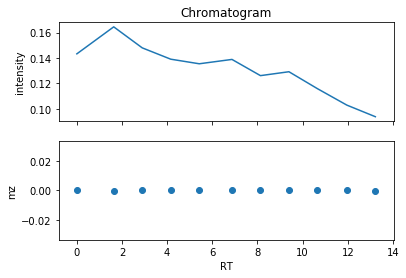

UnknownChemical mz=265.6651 rt=980.83 max_intensity=1.00
[ 327888.9375 1142888.625  2403300.5    4274640.     4500930.5
 4508019.5    4125872.5    2810084.     1931071.75   1562004.625
 1044627.    ]


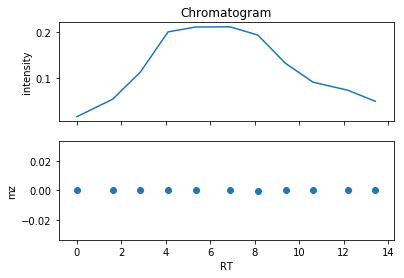

UnknownChemical mz=309.7697 rt=767.18 max_intensity=1.00
[ 22250.640625    33456.671875    50958.484375   132918.328125
 168911.96875    176791.640625    54884.00390625 147844.421875
 130166.3203125   42008.9453125   27882.76953125]


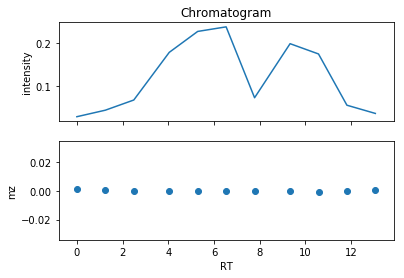

UnknownChemical mz=196.2912 rt=302.60 max_intensity=1.00
[ 56814.6640625   30816.23242188 164445.546875   193823.859375
 102391.6640625  133894.546875   138621.0625      48860.765625
  23120.61914062]


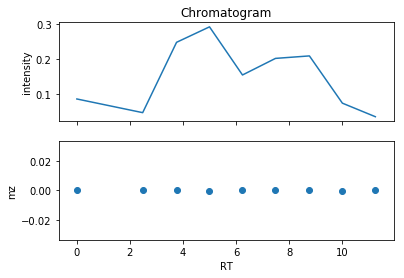

UnknownChemical mz=131.3825 rt=1018.70 max_intensity=1.00
[24159.43164062 17306.34960938 33135.42578125 29151.21289062
 23831.05273438 27339.73632812 86550.5078125  21244.94335938
 32873.71484375]


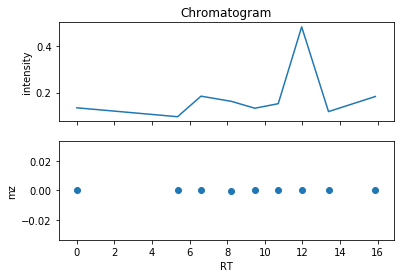

UnknownChemical mz=141.6157 rt=285.28 max_intensity=1.00
[17571.41015625 25209.46484375 50034.3046875  22387.05078125]


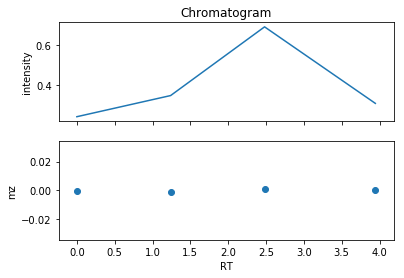

UnknownChemical mz=153.8619 rt=461.25 max_intensity=1.00
[ 196479.34375  406427.25    1014765.625   1627285.5     2036058.625
 2407116.5     2220292.75    1539173.875   1044007.8125   599370.625
  379613.28125]


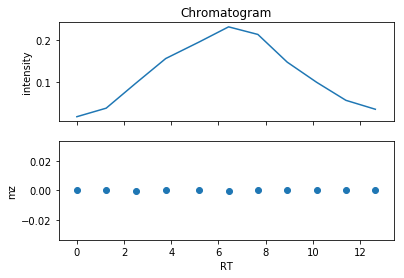

UnknownChemical mz=172.7988 rt=460.62 max_intensity=1.00
[ 806226.375   806342.3125  821750.625  1045370.9375 1009869.
  902093.1875  920729.875   905916.375 ]


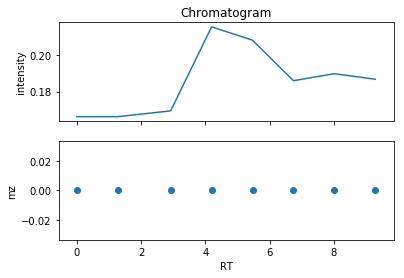

UnknownChemical mz=309.6194 rt=446.77 max_intensity=1.00
[622045.75      911380.5625    898350.0625    775107.25
 533929.4375    590165.4375    200050.234375   85206.3515625]


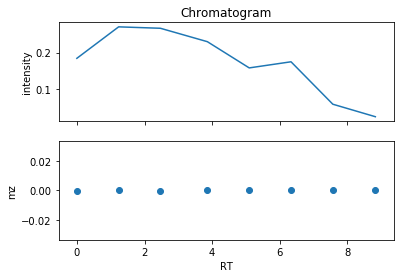

UnknownChemical mz=165.4013 rt=1115.21 max_intensity=1.00
[166464.90625    77506.5390625 211626.21875   193694.015625
 177994.296875  228873.25      301346.25      248614.8125
 233125.84375   246437.203125  273651.6875    289794.
 313248.6875    356389.96875   289724.53125   206555.5
 115986.734375  191639.140625  138725.         47665.859375
 132082.1875     72067.1875     78951.6953125  67309.5703125]


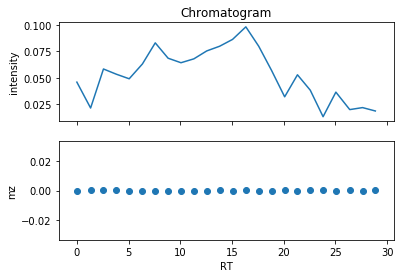

In [17]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in sampled_chemicals[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

Acquisition open


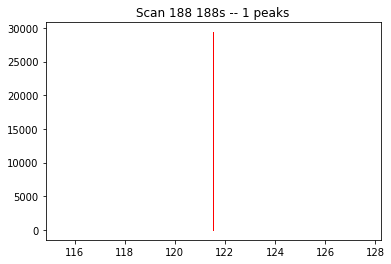

121.5282933755739 29365.327259682253


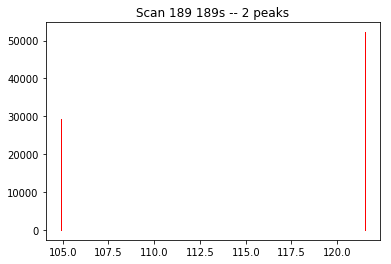

104.89306298559968 29163.827893480644
121.52822831308434 52192.001265698054


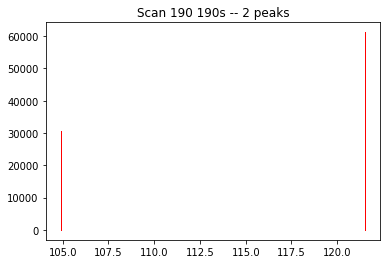

104.89313563697463 30695.607598099697
121.52826260756862 61209.186499619515


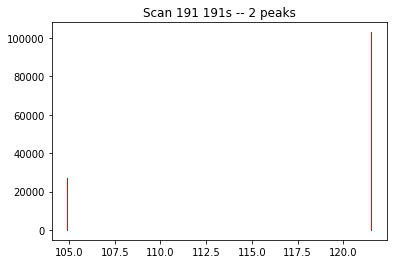

104.89330763774542 27278.35704973973
121.52826260756862 103008.8173556664


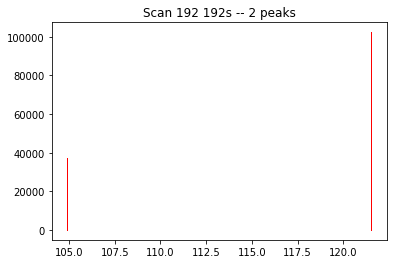

104.8930864958751 37122.337635126125
121.52830360204702 102359.52126584812


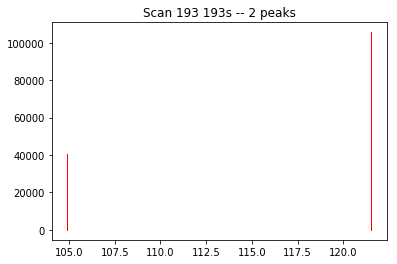

104.89312574909677 40823.153800221946
121.52831660131591 105638.79387270487


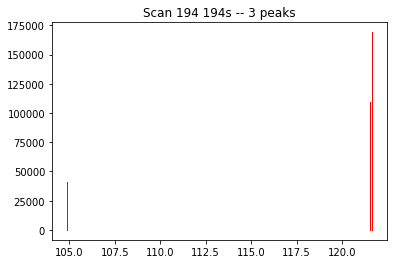

104.8931922419663 41223.43772524568
121.52830079703361 109097.01763015683
121.6227611716031 169139.48928926743


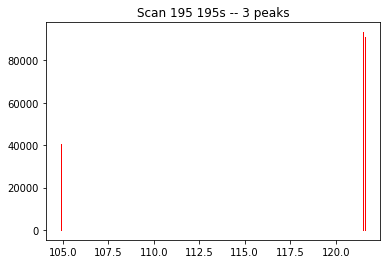

104.89321799489979 40543.38176137225
121.5282786972484 93342.19366900023
121.6222836471283 91089.09255985776


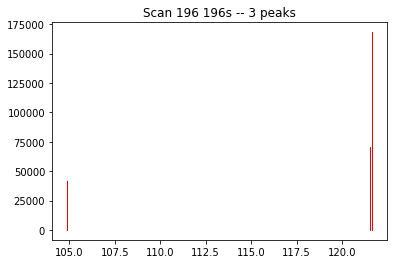

104.89314434024573 41882.59229352303
121.52829100272339 70802.70175631982
121.62221701486119 168168.17368679005


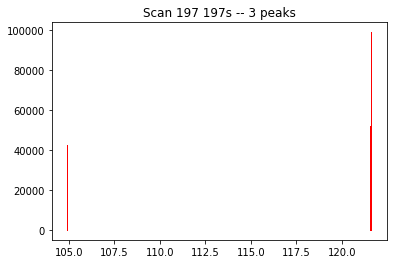

104.89309286536147 42558.10815491555
121.52834412265949 52069.06626638462
121.6227844203381 98847.66750625915


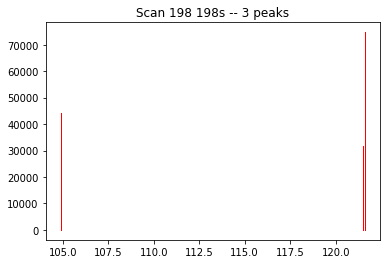

104.89309239045228 44231.96606048317
121.52837667344032 31880.588767699446
121.62300056082992 74726.93141852473


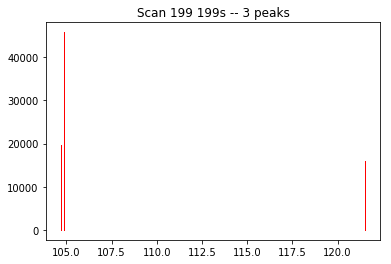

104.68897584100422 19638.790921480522
104.8931661339432 45756.843620295585
121.5283717539314 15995.81057541488


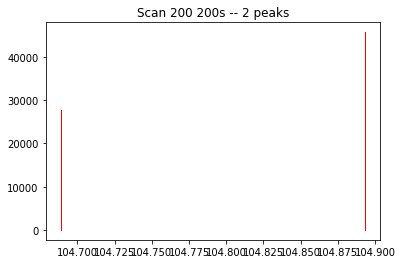

104.68890937584882 27819.960178566365
104.89327997965562 45732.553234504885


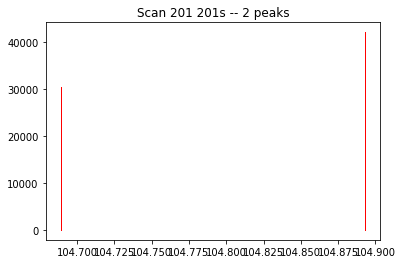

104.68898226988196 30388.069341804785
104.8932062656991 42007.46192687854


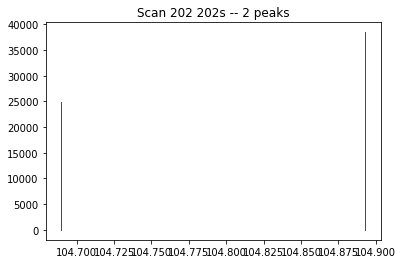

104.68942419780312 24844.099574147986
104.89304481711129 38444.047161200564


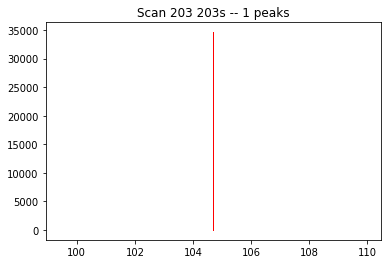

104.68936122379448 34612.831267666756


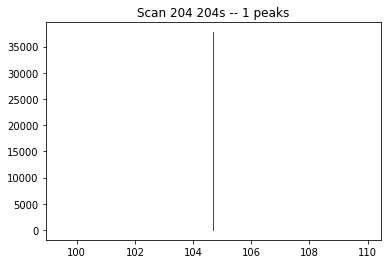

104.68921863441341 37742.74259473012


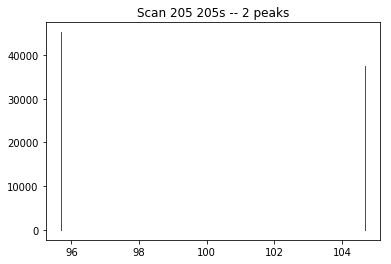

95.68856513757027 45223.02715640147
104.68917901129723 37571.097281856535


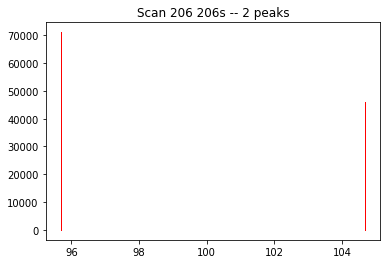

95.68876925064131 71086.16212782318
104.68924817626375 46179.02060118922


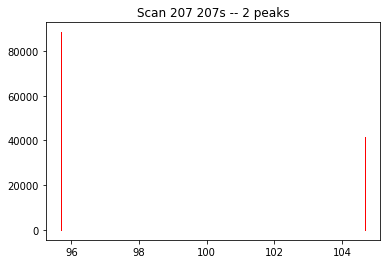

95.68684649531491 88412.73768247842
104.68882979011212 41571.25072746778


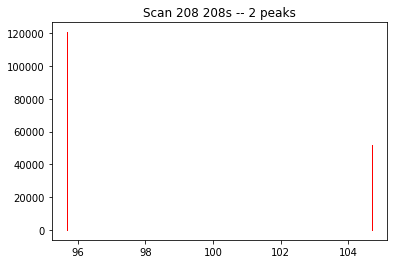

95.6875450656816 120652.69018450734
104.68896860289337 52027.0803739311


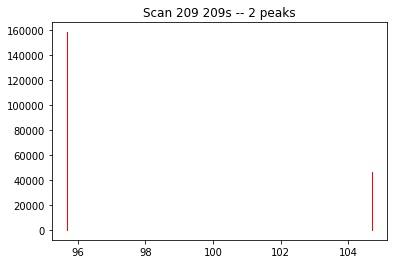

95.68856194291206 158312.61062080011
104.68910072587684 46054.26027890368


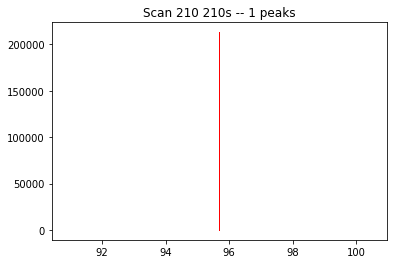

95.68875736652507 213210.82694072142


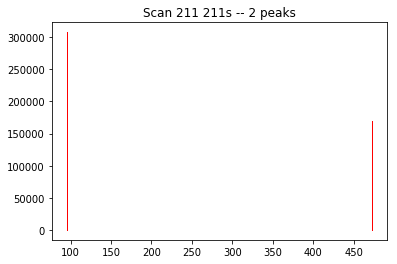

95.68773657902997 307829.8830257589
472.18323155535415 169187.6667862621


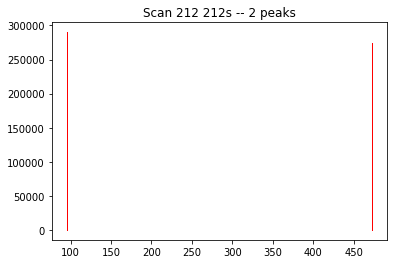

95.68857538069209 290037.47261314193
472.18299048016945 274412.18176847993


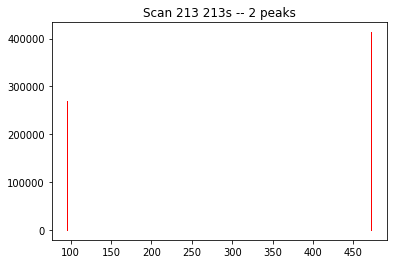

95.68847081691733 270028.4505651594
472.18262265494224 413287.6947471941


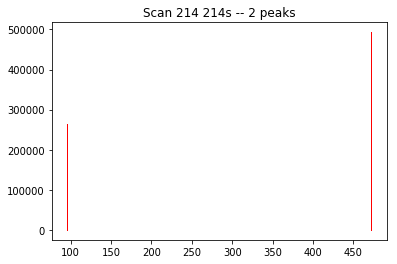

95.68821255809729 265107.271949419
472.18273573651146 492993.217215432


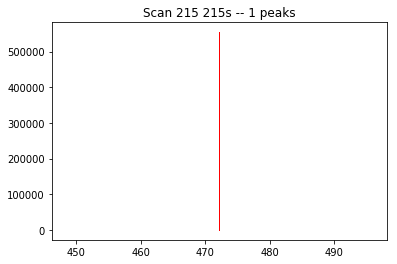

472.1826377667578 554249.8915507641


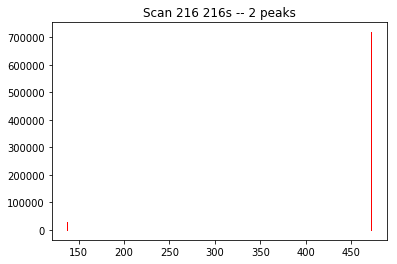

137.35739417720092 27707.365437474473
472.1827549678172 718466.5281879543


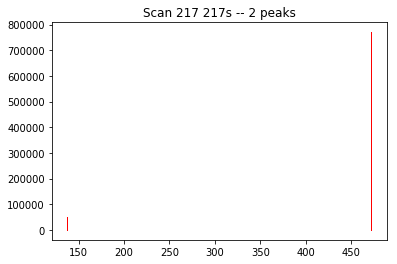

137.35732220178107 49609.27501917302
472.18279215527735 770241.0050852832


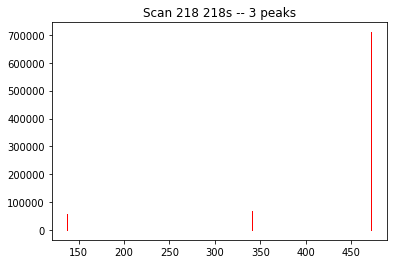

137.35740725340554 56332.12232926411
341.35267294190095 66249.30653908162
472.1826678712977 709738.5214589329


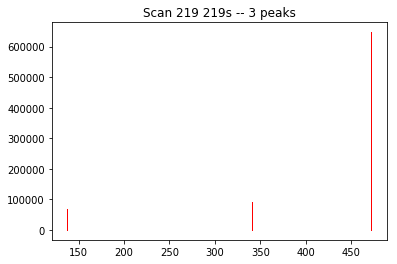

137.3574094335499 67811.54434479204
341.352775486375 90962.7041377702
472.1823989850384 647096.4814326287


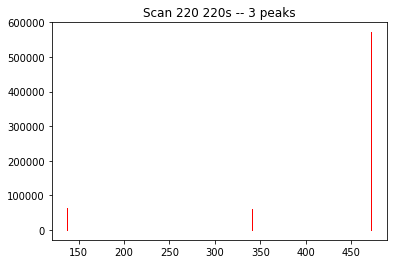

137.35740779463612 64307.44023873032
341.3526311952253 59818.50714947707
472.1821538639292 571729.8125796566


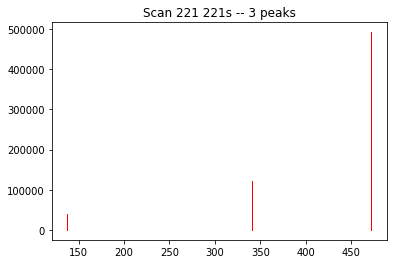

137.35745202001277 39062.75714739274
341.352755097391 122569.20756656684
472.18242261518094 492415.77327248733


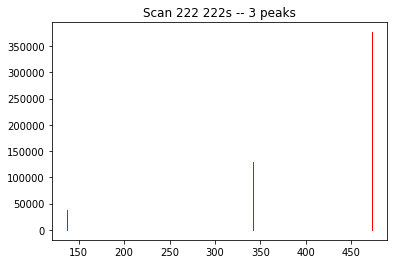

137.35748792304568 37257.907144568904
341.35273228012016 129952.35792167003
472.1823568556663 376383.7221980188


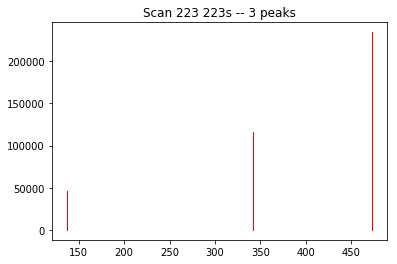

137.3574388739371 46247.16366124566
341.3527246341699 116593.70577817844
472.1820279591657 234329.50916011972


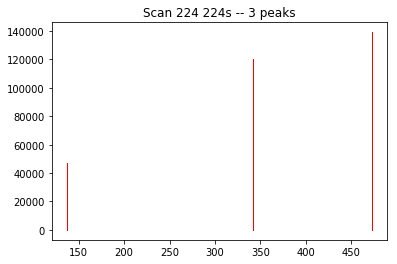

137.35739782162577 46841.68296113672
341.35287216389844 120512.29187678729
472.18310562645144 139117.3252067457
Acquisition closing


In [18]:
max_rt = 225
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals)
controller = SimpleMs1Controller(mass_spec)
controller.run(max_rt)

### Set up a Top-N controller

Acquisition open
Scan 188 -- num_peaks=1 rt=188.00 ms_level=1
Isolated precursor ion 121.5282933755739 window [[(121.52768573410701, 121.52890101704078)]]



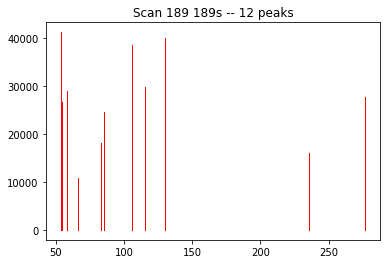

53.75762580786828 17092.157096670286
53.789302655617504 41158.915211889034
54.82023560444332 26596.300485995867
58.23749641721168 28830.77999837504
66.39921315242674 10839.035477499161
82.87288361360667 18186.143870336633
85.17077750830084 24533.515839127736
105.80308397969216 38500.86026282905
115.16446792988926 29677.198417802316
129.78499938151188 39871.9973011625
235.64171043306487 16046.287729100615
276.7567752896871 27623.8148155509

Scan 190 -- num_peaks=2 rt=190.00 ms_level=1
Excluded precursor ion 121.52826260756862 190 ExclusionItem(from_mz=121.52768573410701, to_mz=121.52890101704078, from_rt=158, to_rt=218)
Isolated precursor ion 104.89313563697463 window [[(104.89261117129645, 104.89366010265282)]]



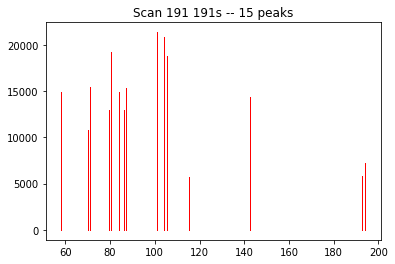

58.014531267340175 14942.967808879235
70.27305220892674 10734.205091129434
71.24300028765033 15474.740120079949
79.74105748408978 12922.427045378847
80.24260944148735 19257.912866664163
83.9763070863551 14933.129084272445
86.34834006798226 12994.738453757454
87.26445299739129 15340.822451548505
100.77930190126156 21341.928378346052
104.0592729118738 20795.16331799206
105.65218233655479 18784.251835042007
115.2185858664836 5737.643096496423
142.53625207707037 14385.664031001763
192.56126654786405 5773.60396152902
194.14338051141573 7245.542406744268

Scan 192 -- num_peaks=2 rt=192.00 ms_level=1
Excluded precursor ion 121.52830360204702 192 ExclusionItem(from_mz=121.52768573410701, to_mz=121.52890101704078, from_rt=158, to_rt=218)
Excluded precursor ion 104.8930864958751 192 ExclusionItem(from_mz=104.89261117129645, to_mz=104.89366010265282, from_rt=160, to_rt=220)

Scan 193 -- num_peaks=2 rt=193.00 ms_level=1
Excluded precursor ion 121.52831660131591 193 ExclusionItem(from_mz=121.527685

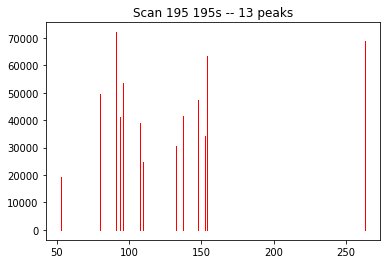

52.90275436707281 19368.652721602284
80.31173205792095 49405.69004455801
91.22351443713049 72039.69413599174
93.81155053423551 41002.66758084432
95.9902104015922 53657.09249030955
107.50709201896463 38983.066744780685
109.90207058123121 24929.091026003447
132.36052546176467 30429.767867759114
137.49834358652217 41667.78005864231
147.98013911008653 47469.34990919024
152.82702083182605 34091.759092537446
154.12467537436265 63311.223744963405
263.31486254135854 68825.12518886007

Scan 196 -- num_peaks=3 rt=196.00 ms_level=1
Excluded precursor ion 121.62221701486119 196 ExclusionItem(from_mz=121.62215305779723, to_mz=121.62336928540897, from_rt=164, to_rt=224)
Excluded precursor ion 121.52829100272339 196 ExclusionItem(from_mz=121.52768573410701, to_mz=121.52890101704078, from_rt=158, to_rt=218)
Excluded precursor ion 104.89314434024573 196 ExclusionItem(from_mz=104.89261117129645, to_mz=104.89366010265282, from_rt=160, to_rt=220)

Scan 197 -- num_peaks=3 rt=197.00 ms_level=1
Excluded prec

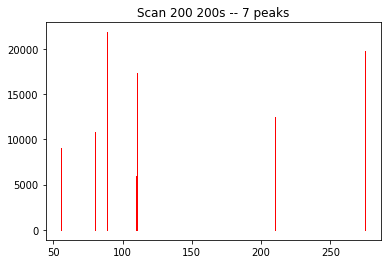

55.51040958857532 9041.61140664204
80.15051565202468 10809.148298117667
88.91941561029904 21833.817201583784
110.03204255073732 5923.6654017174105
110.6450985165622 17277.315547214028
210.20627061319144 12436.408566570017
275.23934649325497 19786.66033395865

Scan 201 -- num_peaks=2 rt=201.00 ms_level=1
Excluded precursor ion 104.8932062656991 201 ExclusionItem(from_mz=104.89261117129645, to_mz=104.89366010265282, from_rt=160, to_rt=220)
Excluded precursor ion 104.68898226988196 201 ExclusionItem(from_mz=104.68845239612502, to_mz=104.68949928588343, from_rt=169, to_rt=229)

Scan 202 -- num_peaks=2 rt=202.00 ms_level=1
Excluded precursor ion 104.89304481711129 202 ExclusionItem(from_mz=104.89261117129645, to_mz=104.89366010265282, from_rt=160, to_rt=220)
Excluded precursor ion 104.68942419780312 202 ExclusionItem(from_mz=104.68845239612502, to_mz=104.68949928588343, from_rt=169, to_rt=229)

Scan 203 -- num_peaks=1 rt=203.00 ms_level=1
Excluded precursor ion 104.68936122379448 203 Exclus

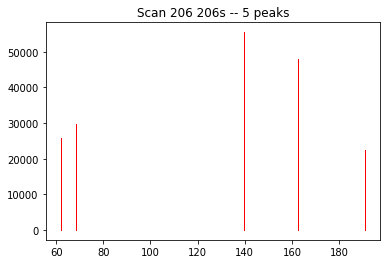

61.97778173871438 25746.667726199994
68.57034267198148 29609.57918834646
139.71635092565057 55505.17635475263
162.4288823424436 47958.67320813309
191.03780126381318 22538.87460317695

Scan 207 -- num_peaks=2 rt=207.00 ms_level=1
Isolated precursor ion 95.68684649531491 window [[(95.68636806108243, 95.68732492954739)]]
Excluded precursor ion 104.68882979011212 207 ExclusionItem(from_mz=104.68845239612502, to_mz=104.68949928588343, from_rt=169, to_rt=229)

Scan 209 -- num_peaks=2 rt=209.00 ms_level=1
Excluded precursor ion 95.68856194291206 209 ExclusionItem(from_mz=95.68808669474457, to_mz=95.68904358039596, from_rt=175, to_rt=235)
Excluded precursor ion 104.68910072587684 209 ExclusionItem(from_mz=104.68845239612502, to_mz=104.68949928588343, from_rt=169, to_rt=229)

Scan 210 -- num_peaks=1 rt=210.00 ms_level=1
Excluded precursor ion 95.68875736652507 210 ExclusionItem(from_mz=95.68808669474457, to_mz=95.68904358039596, from_rt=175, to_rt=235)

Scan 211 -- num_peaks=2 rt=211.00 ms_leve

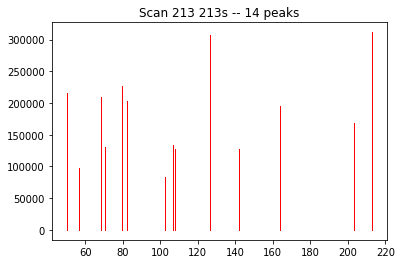

50.35125536024276 215251.30167426632
56.46438575867143 97744.091889821
68.48633816535292 209413.4816097119
70.42604416263737 130748.69394546769
79.62454860412977 226165.9515789598
82.06829537973712 202689.33937068636
102.73438281605453 83105.54556330101
106.62051460510739 134375.14783416706
107.63020137308882 127867.95518244545
126.29986677592193 306772.5582728345
142.09921317301965 128076.32270635766
163.72754242299405 195917.7185217295
203.04283148788554 167968.36901211576
212.59254632548044 311443.9731221667

Scan 214 -- num_peaks=2 rt=214.00 ms_level=1
Excluded precursor ion 472.18273573651146 214 ExclusionItem(from_mz=472.18087063919637, to_mz=472.18559247151194, from_rt=181, to_rt=241)
Excluded precursor ion 95.68821255809729 214 ExclusionItem(from_mz=95.68808669474457, to_mz=95.68904358039596, from_rt=175, to_rt=235)

Scan 215 -- num_peaks=1 rt=215.00 ms_level=1
Excluded precursor ion 472.1826377667578 215 ExclusionItem(from_mz=472.18087063919637, to_mz=472.18559247151194, from_

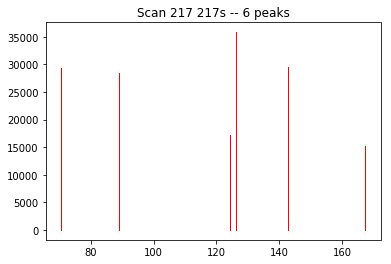

70.55859167841385 29333.962432342934
89.13840616203028 28373.810793019948
124.26230092230011 17209.065552794604
126.29898883687429 35843.462745918485
142.6199128387027 29603.75949372089
167.32586193963581 15252.99471824151

Scan 218 -- num_peaks=3 rt=218.00 ms_level=1
Excluded precursor ion 472.1826678712977 218 ExclusionItem(from_mz=472.18087063919637, to_mz=472.18559247151194, from_rt=181, to_rt=241)
Isolated precursor ion 341.35267294190095 window [[(341.3509661785362, 341.35437970526567)]]
Excluded precursor ion 137.35740725340554 218 ExclusionItem(from_mz=137.35670739023, to_mz=137.35808096417182, from_rt=186, to_rt=246)



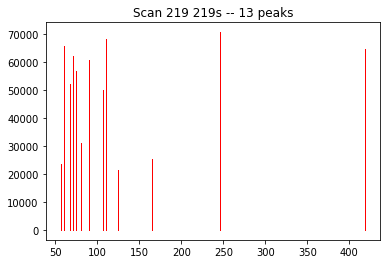

56.421500687881505 23452.74116462468
60.44418870665956 65566.10052836986
66.8747384697448 52011.80787063929
70.8359955913939 62039.777036434905
75.11553399884755 56611.04287418361
81.03465388343659 31021.90845893689
89.44031302763182 60488.57341236725
106.30619818840087 49878.18279998722
110.85465639395436 67973.25870446398
125.0772725078033 21423.46750738787
164.91334491102884 25470.66333873804
245.48900006205926 70556.19587623299
419.0090744074717 64734.74243729246

Scan 220 -- num_peaks=3 rt=220.00 ms_level=1
Excluded precursor ion 472.1821538639292 220 ExclusionItem(from_mz=472.18087063919637, to_mz=472.18559247151194, from_rt=181, to_rt=241)
Excluded precursor ion 137.35740779463612 220 ExclusionItem(from_mz=137.35670739023, to_mz=137.35808096417182, from_rt=186, to_rt=246)
Excluded precursor ion 341.3526311952253 220 ExclusionItem(from_mz=341.3509661785362, to_mz=341.35437970526567, from_rt=188, to_rt=248)

Scan 221 -- num_peaks=3 rt=221.00 ms_level=1
Excluded precursor ion 472.1

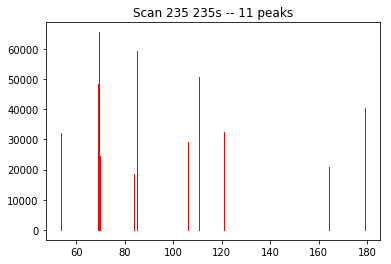

53.66797854822074 32099.35851092067
69.16234933924551 48444.74442614853
69.47999240168969 65564.81245378903
69.75605013036143 24533.102466190907
83.64351370589343 18487.350785809278
85.04981813297714 59502.57020292433
106.1473945582595 29120.406165499408
110.51719134824867 50708.00183743515
120.9405799169237 32423.78019602025
164.30979816756184 20773.558864063718
179.13064580954608 40422.99054859035

Scan 236 -- num_peaks=1 rt=236.00 ms_level=1
Excluded precursor ion 149.53662185940843 236 ExclusionItem(from_mz=149.53542739157882, to_mz=149.53692275332958, from_rt=204, to_rt=264)

Scan 237 -- num_peaks=1 rt=237.00 ms_level=1
Excluded precursor ion 149.5368575163822 237 ExclusionItem(from_mz=149.53542739157882, to_mz=149.53692275332958, from_rt=204, to_rt=264)

Scan 238 -- num_peaks=1 rt=238.00 ms_level=1
Excluded precursor ion 149.53674236562728 238 ExclusionItem(from_mz=149.53542739157882, to_mz=149.53692275332958, from_rt=204, to_rt=264)

Scan 239 -- num_peaks=1 rt=239.00 ms_level=1


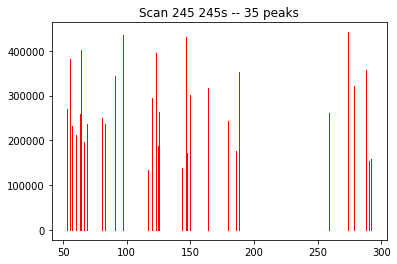

53.06259065931027 270728.95373343065
55.076542039634525 381445.56894797046
56.82821567988536 232167.05514316773
59.730574593392205 211357.59603034987
63.43022113708698 259844.16368033562
63.996156508977 402244.54639677546
64.1470476438224 291789.1926409178
66.42048525977161 197204.5910322959
68.8848536213136 235687.43603860174
80.66469006208386 246907.84197797213
80.92020166880621 249582.46763475813
82.60835190237601 143024.08872541322
82.96108124265903 237451.62598107557
90.54540432332502 343542.677195584
97.37893355702909 434484.9650933441
116.4687768336763 133739.56295705336
120.16024312076274 295616.67509215017
123.2321407840032 394122.41719251126
124.90942827904117 187189.1716967073
125.06528693140092 264359.0195096067
125.24500563311442 232315.2403943652
143.2833181744795 138246.57574338614
146.961939375859 431303.5719759506
147.13924519884634 172612.2793579847
149.69952917276984 302218.7416954168
163.97322191214914 316134.71596087
179.47438860982956 242552.641546551
185.71262405

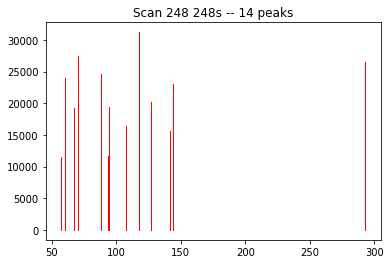

57.08881674541644 11551.066459174297
60.61757628837 23930.27380959957
67.19642328725335 19173.289188432504
67.51641259186614 16006.784490397638
70.62986269702446 27496.443215980373
87.86082780043557 24684.139687831987
93.55397184039944 11606.553690561315
94.00199408906667 19405.38516734748
107.80579248895636 16452.399626046248
117.8912749556826 31196.129045069047
127.08670502831272 20227.614627506024
141.74859211646051 15532.820651216161
143.9239390895835 22984.7738567846
292.9211161008061 26470.463314495115

Scan 249 -- num_peaks=2 rt=249.00 ms_level=1
Excluded precursor ion 205.61619095511574 249 ExclusionItem(from_mz=205.61523868886613, to_mz=205.61729485153384, from_rt=214, to_rt=274)
Excluded precursor ion 289.07241719122004 249 ExclusionItem(from_mz=289.0710121605833, to_mz=289.0739028851585, from_rt=217, to_rt=277)

Scan 250 -- num_peaks=2 rt=250.00 ms_level=1
Excluded precursor ion 205.6162082117638 250 ExclusionItem(from_mz=205.61523868886613, to_mz=205.61729485153384, from_rt

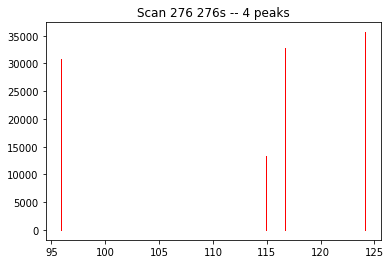

95.87953129659643 30882.522147602744
114.96253490760486 13342.75644468657
116.68454130442224 32777.067833347435
124.15696840829858 35625.46564228257

Scan 277 -- num_peaks=1 rt=277.00 ms_level=1
Excluded precursor ion 285.80270347367457 277 ExclusionItem(from_mz=285.801232320306, to_mz=285.80409034691934, from_rt=245, to_rt=305)

Scan 278 -- num_peaks=1 rt=278.00 ms_level=1
Excluded precursor ion 285.80273070776474 278 ExclusionItem(from_mz=285.801232320306, to_mz=285.80409034691934, from_rt=245, to_rt=305)

Scan 279 -- num_peaks=1 rt=279.00 ms_level=1
Excluded precursor ion 285.8027462986151 279 ExclusionItem(from_mz=285.801232320306, to_mz=285.80409034691934, from_rt=245, to_rt=305)

Scan 280 -- num_peaks=1 rt=280.00 ms_level=1
Excluded precursor ion 285.8027219218013 280 ExclusionItem(from_mz=285.801232320306, to_mz=285.80409034691934, from_rt=245, to_rt=305)

Scan 281 -- num_peaks=1 rt=281.00 ms_level=1
Excluded precursor ion 285.80265232959596 281 ExclusionItem(from_mz=285.8012323

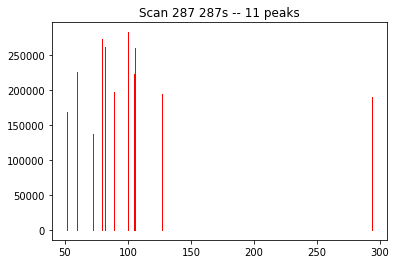

51.75682160829859 168337.3398151745
59.729180347359005 225898.19208213972
72.29706696879794 136970.2410401044
79.73141051520422 273073.9016995555
81.5791551554918 262424.9827666886
89.12085984201404 197019.880830931
99.83670307546168 283056.65370730683
104.76874800696926 223350.36991855912
105.67164527367363 260581.09320548378
126.85761393249715 195287.12263062102
293.32069033428706 190245.15330278027

Scan 288 -- num_peaks=1 rt=288.00 ms_level=1
Isolated precursor ion 140.60920979932777 window [[(140.60850675327876, 140.60991284537678)]]



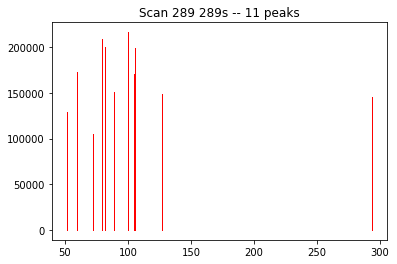

51.75682160829859 128644.72050866291
59.729180347359005 172633.1770225556
72.29706696879794 104673.73665257392
79.73141051520422 208685.22575514004
81.5791551554918 200547.23806125
89.12085984201404 150564.14418793411
99.83670307546168 216314.12343972074
104.76874800696926 170686.11126459917
105.67164527367363 199138.1231405172
126.85761393249715 149239.95672820168
293.32069033428706 145386.8440693853

Scan 291 -- num_peaks=1 rt=291.00 ms_level=1
Isolated precursor ion 253.8594751694952 window [[(253.85820587211936, 253.86074446687104)]]



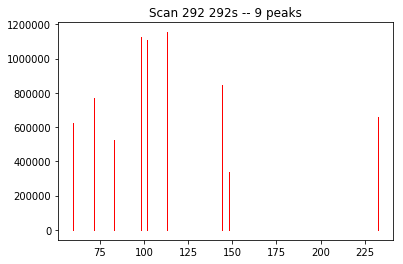

59.99612795919716 624053.2132332958
71.59364964062887 770015.9071302047
83.09735928174963 522863.06526100886
98.10893617442633 1128415.2562774217
101.87722329839396 1107957.0772651662
113.2688600587559 1153964.2511786995
144.44194781491782 844918.7846248015
148.2408600805669 339967.3645960867
232.4423933358245 656736.945449529

Scan 293 -- num_peaks=2 rt=293.00 ms_level=1
Excluded precursor ion 253.85921211728183 293 ExclusionItem(from_mz=253.85820587211936, to_mz=253.86074446687104, from_rt=261, to_rt=321)
Isolated precursor ion 159.01457696293537 window [[(159.01378189005055, 159.01537203582018)]]



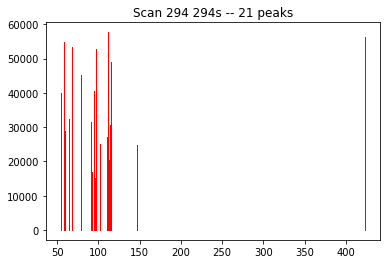

54.508792370943716 39824.36493593694
58.126743204064034 54884.899554280506
60.027641595883004 28988.441066814477
65.0164537777579 32521.38355804667
67.56921144429008 53338.44264284081
67.95428912292864 35187.66515916481
68.424685846636 41671.672393910114
79.58382015085047 45280.901317518794
91.2040092956077 31564.982186693764
92.08958665998556 16818.57054801395
94.22662170858047 40494.6536298747
95.8178651970672 15281.74877191918
97.2890867987159 52667.959549453706
102.48776862457927 25047.767501283914
110.69841885969586 27135.626012513123
112.11531108811039 57705.33772985562
113.08086898038479 20370.68158845134
114.22353772574934 30497.70490549128
115.21435146699659 49150.83613844456
146.5841185128059 24696.540643189524
423.2855934329279 56200.054318577735

Scan 295 -- num_peaks=2 rt=295.00 ms_level=1
Excluded precursor ion 253.8603020272099 295 ExclusionItem(from_mz=253.85820587211936, to_mz=253.86074446687104, from_rt=261, to_rt=321)
Excluded precursor ion 159.01453619847754 295 Exc

In [19]:
max_rt = 300                    # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 30                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.run(max_rt)

In [20]:
controller.write_mzML('my_analysis', '../models/out.mzML')

c:\users\vinny\.virtualenvs\simulator-r22bo2kk\lib\site-packages\psims\utils.py:408: StateTransitionWarning:

Transition from 'file_description' to 'data_processing_list' is not valid. Expected one of ['reference_param_group_list', 'sample_list', 'software_list']

c:\users\vinny\.virtualenvs\simulator-r22bo2kk\lib\site-packages\psims\utils.py:408: StateTransitionWarning:

Transition from 'data_processing_list' to 'sample_list' is not valid. Expected one of ['run']

c:\users\vinny\.virtualenvs\simulator-r22bo2kk\lib\site-packages\psims\utils.py:408: StateTransitionWarning:

Transition from 'instrument_configuration_list' to 'run' is not valid. Expected one of ['data_processing_list']

c:\users\vinny\.virtualenvs\simulator-r22bo2kk\lib\site-packages\psims\document.py:92: ReferentialIntegrityWarning:

Overwriting existing value for 211 with 'SPECTRUM_211' in store Spectrum

